In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/swedish-motor-insurance/SwedishMotorInsurance.csv


# Checking simple linear regression assumptions

## Simple Linear Regression

### Simple Linear Regression assumptions

- Linear relationship between X and Y
- Resids normally distributed, with mean equal zero
- Constante Resid variance Homoscedasticity
- No autocerrelation of erros
- No multicolinearity 

In [2]:
data = pd.read_csv("/kaggle/input/swedish-motor-insurance/SwedishMotorInsurance.csv")
data = data[['Claims', 'Insured', 'Payment', 'Kilometres']]
data.head()

,Claims,Insured,Payment,Kilometres
0,108,455.13,392491,1
1,19,69.17,46221,1
2,13,72.88,15694,1
3,124,1292.39,422201,1
4,40,191.01,119373,1


In [3]:
round(data.describe(), 2)

,Claims,Insured,Payment,Kilometres
count,2182.00,2182.00,2182.00,2182.00
mean,51.87,1092.20,257007.64,2.99
std,201.71,5661.16,1017282.59,1.41
min,0.00,0.01,0.00,1.00
25%,1.00,21.61,2988.75,2.00
50%,5.00,81.53,27403.50,3.00
75%,21.00,389.78,111953.75,4.00
max,3338.00,127687.27,18245026.00,5.00


## $\beta$ formulas for simple linear regression

$$ \beta_{1} = {\sum_{i=1}^{n} (X_{i} - \bar{X})(Y_{i} - \bar{Y}) \over \sum_{i=1}^{n} (X_{i} - \bar{X})^2} $$

$$ \beta_{0} = {\bar{Y} - \beta_{1}.\bar{X}} $$

In [4]:
x = data['Claims']
y = data['Payment']
x_mean = np.mean(x)
y_mean = np.mean(y)

sum_num = sum([ (x[i] - x_mean)*(y[i] - y_mean) for i in range(len(x))])
sum_den = sum([ (x[i] - x_mean)**2 for i in range(len(y))])

b1 = sum_num/sum_den
b0 = y_mean - b1*x_mean

print(f"Beta0 = {b0} \nBeta1 = {b1}")

Beta0 = -3362.29446716269 
Beta1 = 5020.077648225685


## $\beta$ formula for multiple linear regression

$$ \hat{\beta} = (X^{T}X)^{-1}X^{T}Y $$

- $X$ = matrix with the independent variables values
- $X^T$ = matrix X transposed
- $(X^{T}X)^{-1}$ = inversed matrix of the multiplication of X matrix by it's transposed
- $Y$ = matrix with the dependent variable values

In [5]:
import numpy.linalg as npl

X = np.array([np.repeat(1, data.shape[0], axis = 0), #This step is necessary to include the intercept
               np.array(data['Claims']),
               np.array(data['Insured'])])
Y = np.array(data['Payment'])

XtX = np.matmul(X, X.transpose()) 

XtX_1 = npl.inv(XtX)

XtY = np.matmul(X, Y)

betas = np.matmul(XtX_1, XtY)

print(f"Beta0 = {round(betas[0], 4)} \nBeta1 = {round(betas[1], 4)} \nBeta2 = {round(betas[2], 4)}")

Beta0 = 3250.7447 
Beta1 = 4294.775 
Beta2 = 28.3881


## Fitting the model

In [6]:
exog = data[['Claims', 'Insured']]
## This step is necessary to include the intercept in the regression.
exog = sm.add_constant(exog)

model = sm.OLS(endog = data['Payment'], exog = exog).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.211e+05
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:12:28   Log-Likelihood:                -27477.
No. Observations:                2182   AIC:                         5.496e+04
Df Residuals:                    2179   BIC:                         5.498e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3250.7447   1582.708      2.054      0.0

# Checking the Linear Regression Assumptions

## Simple Linear Regression assumptions

- Linear relationship between X and Y
- Resids normally distributed, with mean equal zero
- Constante Resid variance Homoscedasticity
- No autocerrelation of erros
    plt.plot(residuals.index, residuals) with no pattern
    Durbin Watson test
- No multicolinearity 
    statsmodels.stats.outliers_influence import variance_inflation_factor
    {X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}
- Resids independent from the features
    Plot Features x Resid with no pattern

## Linear relationship between X and Y

There are two ways to check this assumption:

- Plotting the scatter plot
- F statistical test

If they are have no linear relationship, you may consider applying some transformation in the X feature (log, squared...)

### Plotting the scatter plot

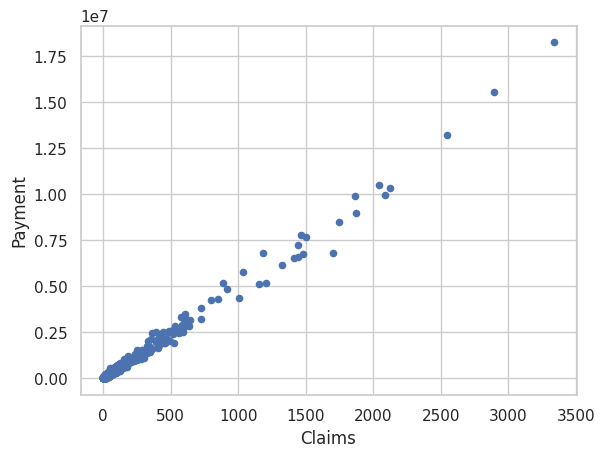

In [7]:
# Plotting the scatter plot

data.plot.scatter(x = 'Claims',
                  y = 'Payment')
plt.show()

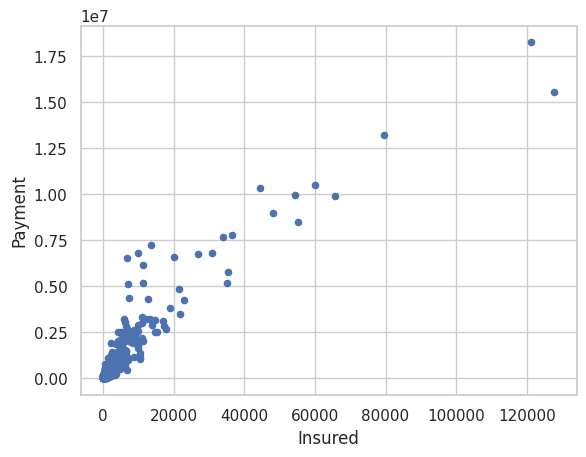

In [8]:
# Plotting the scatter plot

data.plot.scatter(x = 'Insured',
                  y = 'Payment')
plt.show()

### F statistical test

In [9]:
print(model.f_test("Claims = 0"))

# The F test check the hypotesis if the Beta for the variable Claims is equal zero. 
# If the hypotesis is true, there are evidences to say that there is no linear relationship between Claims and Payment.

# It is importante to say that both statistical test and plotting are importante tools to check this assumption


<F test: F=55187.262845552104, p=0.0, df_denom=2.18e+03, df_num=1>


- The plots show clear linear relationship between both independent variables and Y.
- The p-value for the F test is really low, lower than 0.05

So there are evidences to confirm a linear relationship between Claims and Payment / Insured and Payment.

## Resids normally distributed, with mean equal zero

- Plotting the QQPlot
- Kolmogorov-Smirnov test for normality

### Plotting the QQPlot

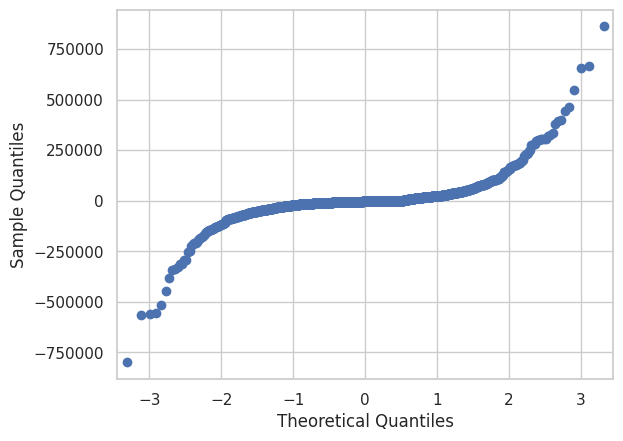

In [10]:
#stats.probplot(model.resid, dist="norm", plot=pylab)
sm.qqplot(model.resid)

plt.show()

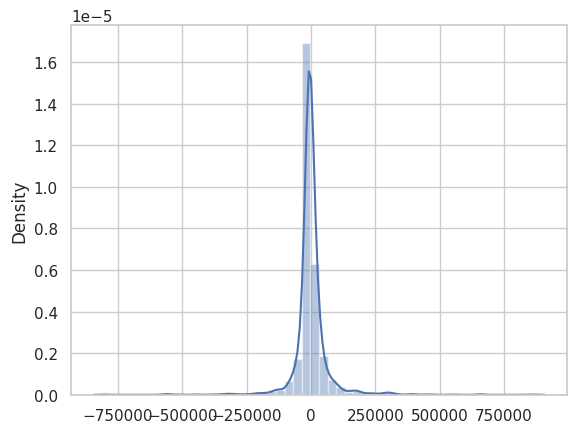

In [11]:
sns.distplot(model.resid)
plt.show()

### Kolmogorov-Smirnov Test

In [12]:
ks_stat, pvalue = statsmodels.stats.diagnostic.kstest_normal(model.resid, dist='norm', pvalmethod='table')

print("Test statistic: ", ks_stat, "\np-value: ", pvalue)

Test statistic:  0.21998183942732608 
p-value:  0.0009999999999998899


- The QQPLOT is in a quite strange shape, but we could say it's normaly distributed;
- The histogram is really thin, but distributed arround the mean zero;
- The Kolmogorov-Smirnov Test returns a p-value = 0.0009, lower than 0.05. 

So there are evidences to say the resid are normaly distributed. Confirming this assumption.

## No autocorrelation of the resids

### Plotting the resids

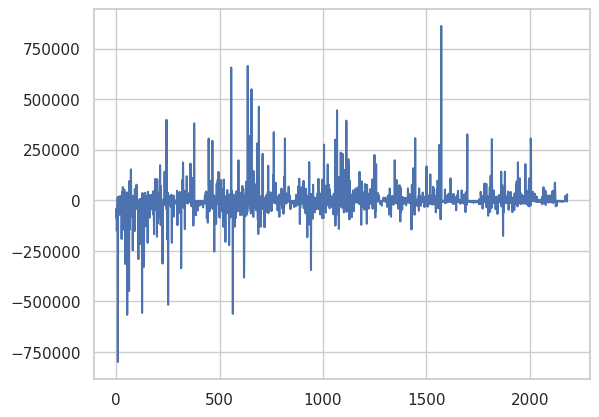

In [13]:
plt.plot(model.resid.index, model.resid)
plt.show()

### Durbin Watson Test

In [14]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html
print(round(statsmodels.stats.stattools.durbin_watson(model.resid), 4))

1.8853


- It doesn't seems like there is autocorrelation between the resids, as we can't see a pattern in the plot.
- Durbin Watson Test returns a test statistic equal 1.8853. Durbin Watson Test Statistic return a value between 0 and 4. If it is close to 2, indicates no autocorrelation.

## Constante Resid variance (homoscedasticity) - Bresch Pagan test

- Plotting the resids X adjusted values
- Bresch Pagan Test

### Plotting the resids X adjusted values

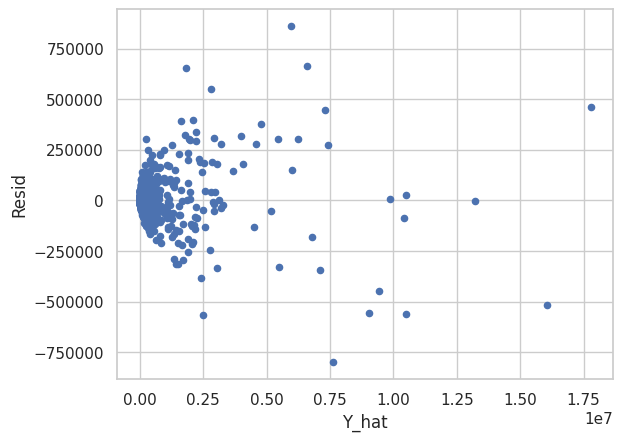

In [15]:
exog = data[['Claims', 'Insured']]
exog = sm.add_constant(exog)

d = {'Resid': model.resid,
     'Y_hat': model.predict(exog)  }

data_resids = pd.DataFrame(d)

data_resids.plot.scatter(x = 'Y_hat',
                  y = 'Resid')
#plot horizontal line
plt.show()

### Bresch Pagan Test

In [16]:
a,b, bp_stat, pvalue = sms.het_breuschpagan(model.resid, model.model.exog)

print("Test statistic: ", bp_stat, "\np-value: ", pvalue)

Test statistic:  618.6104896543025 
p-value:  1.7097552538591094e-213


- The resids are distributed around zero, but indicates that there are outliers in the data.
- The Bresch Pagan test returns a really low p-value, lower than 0.05.

So there are evidences to confirm homoscedasticity. 

## No multicolinearity

- Check the VIF indicator

In [17]:
{exog.columns[i]: variance_inflation_factor(exog = exog.values, exog_idx = i) for i in range(0, exog.shape[1])}

{'const': 1.0760368975500787,
 'Claims': 5.8388383318303685,
 'Insured': 5.8388383318303685}

- Claims and Insured VIFs are greater than 5, indicating high multicollinearity between those variables.

Explanation of some statsmodels OLS result:

- Dep. Variable: Y from the regression;
- Model: The model fitted;
- Method: The method to estimate the $\beta_{0}$ and $\beta_{1}$;
- Date: Date when the model were fitted;
- Time: Hour when the model were fitted;
- No. Observations: Number of observations used to fit the model;
- Df Residuals: Degrees of freedom for the residuals;
- Df Model: Degrees of freedom for the model;
- R-squared: The R^2 for the fitted model; Proportion of the Y variability explained by X;
- Adj. R-squared: The adjusted R^2 for the fitted model;
- F-statistic: Statistical test to check linear relationship between the variables;
- Prob (F-statistic): p-value for the F test;
- AIC: Akaike Information Criterion, metric used to compare several models. The lower AIC, the better;
- BIC: Bayesian Information Criterion, metric also used to compare several models. The lower BIC, the better;
- coef: The betas for the model;
- t: The T statistic for the refered Beta;
- P>|t|: The p-value for the T statistica for the refered Beta;
- Omnibus: In this case, statistical test to check if the resids are Normally distributed;
- Prob (Omnibus): p-value to omnibus test;
- Durbin-Watson: Statistical test to check resids first order autocorrelation. Between 0 and 4. Close to 2, no resids first order autocorrelation. Between 0 and 2, positive autocorrelation. Between 2 and 4, negative autocorrelation;
- Jarque-Bera (JB): Statistical test to check with the resids are Normally distributed;
- Prob(JB): p-value for the Jarque-Bera test;